# Group Connection Testing


In [1]:
import logging
import pandas as pd
import numpy as np
import csv
import networkx as nx
import itertools
import seaborn as sns
from networkx import from_pandas_adjacency
from itertools import chain, combinations
from matplotlib import pyplot as plt
from collections import namedtuple
from graspologic.inference import group_connection_test
from graspologic.plot import heatmap
from pkg.platy import _get_folder, load_connectome_normal_lcc_annotations

/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


         2015233  1318919  2015241  1318929  1318938  1728550  1417265  \
2015233      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
1318919      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2015241      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1318929      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
1318938      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...          ...      ...      ...      ...      ...      ...      ...   
1400756      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2015193      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1957859      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1302513      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1048573      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

         1318965  1278006  1318986  ...  1441660  139142  2015119  147361  \
2015233      0.0      0.0      0.0

In [2]:
folder = _get_folder()
annotations = load_connectome_normal_lcc_annotations()
annotations

,skids,side,class,segment,type,group
0,2015233,l,s,head,100.0,NaN
1,1548290,l,NaN,1,NaN,NaN
2,1318919,l,s,head,88.0,15.0
3,2015241,l,s,head,100.0,NaN
4,1646603,r,NaN,3,NaN,NaN
...,...,...,...,...,...,...
2696,1302513,l,s,head,NaN,NaN
2697,1630186,l,NaN,2,NaN,NaN
2698,1441779,r,NaN,head,NaN,NaN
2699,1671147,r,m,1,165.0,NaN


In [59]:
#get skids for l, r, head, pygidium, 0, 1, 2, 3

skids_hemis = {"l": [], "r": []}
labels_hemis = {"l": [], "r": []}
skids_segs = {"head": [], "pygidium": [], "0": [], "1": [], "2": [], "3": []}
labels_segs = {"head": [], "pygidium": [], "0": [], "1": [], "2": [], "3": []}
poss_labels = ["s", "i", "m"]

#add skids and labels for hemis
for key in skids_hemis:
    for i in range(len(annotations["skids"])):
        if(annotations["side"][i]==key and annotations["class"][i] in poss_labels):
            skids_hemis[key].append(annotations["skids"][i])
            labels_hemis[key].append(annotations["class"][i])

#add skids and labels for segments
for key in skids_segs:
    for i in range(len(annotations["skids"])):
        if(annotations["segment"][i]==key and annotations["class"][i] in poss_labels):
            skids_segs[key].append(annotations["skids"][i])
            labels_segs[key].append(annotations["class"][i])

#dictionaries to dfs
skids_hemis_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in skids_hemis.items()]))
labels_hemis_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in labels_hemis.items()]))
skids_segs_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in skids_segs.items()]))
labels_segs_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in labels_segs.items()]))

#save dfs as csvs to get the adjs in gen_data

skids_hemis_df.to_csv(folder / "skids_hemi_classes.csv")
labels_hemis_df.to_csv(folder / "labels_hemi_classes.csv")
skids_segs_df.to_csv(folder / "skids_segs_classes.csv")
labels_segs_df.to_csv(folder / "labels_segs_classes.csv")



In [47]:
#comparison for hemis
count_hemis = {"l" : {"s": 0, "i": 0, "m": 0}, "r": {"s": 0, "i": 0, "m": 0}}

for key in count_hemis:
    for i in range(len(labels_hemis[key])):
        count_hemis[key][labels_hemis[key][i]] += 1

# get the lists of number of skids for y values, x values are the keys
keys = poss_labels # "s", "i", "m"
list_counts_hemis = []
class_label_hemis = []
hemi_label = []
# loop through "l" and "r"
for key in count_hemis:
    # loop through "s", "i", "m"
    for inner_key in count_hemis[key]:
        # append "s" "i" or "m"
        class_label_hemis.append(inner_key)
        # add 1 to the count of the respective class label in the respective key of count_hemis
        list_counts_hemis.append(count_hemis[key][inner_key])
        # append the outer key from count_hemis
        hemi_label.append(key)

label_counts = list(zip(class_label_hemis, list_counts_hemis, hemi_label))
df_hemis = pd.DataFrame(label_counts, columns = ["class", "count", "side"])
df_hemis.to_csv(folder / "hemi_classes.csv")
df_hemis

,class,count,side
0,s,283,l
1,i,478,l
2,m,108,l
3,s,272,r
4,i,497,r
5,m,121,r


<AxesSubplot:xlabel='class', ylabel='count'>

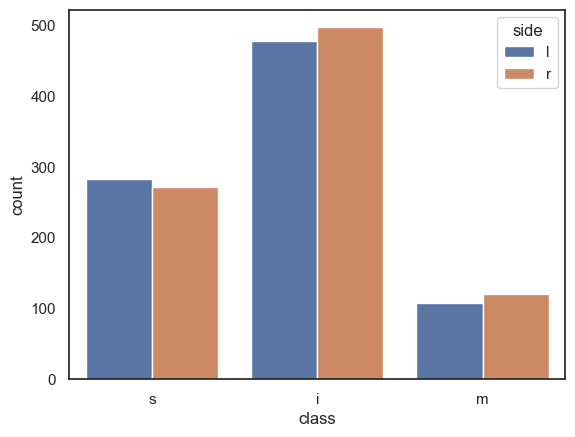

In [39]:
sns.set(style="white")
sns.barplot(x="class", y="count", hue="side", data=df_hemis)

In [44]:
#comparison for hemis
count_segs = {"head" : {"s": 0, "i": 0, "m": 0},
              "pygidium": {"s": 0, "i": 0, "m": 0},
              "0" : {"s": 0, "i": 0, "m": 0},
              "1" : {"s": 0, "i": 0, "m": 0},
              "2" : {"s": 0, "i": 0, "m": 0},
              "3" : {"s": 0, "i": 0, "m": 0},}

for key in count_segs:
    for i in range(len(labels_segs[key])):
        count_segs[key][labels_segs[key][i]] += 1
print(count_segs)
# get the lists of number of skids for y values, x values are the keys
keys = poss_labels # "s", "i", "m"
list_counts_segs = []
class_label_segs = []
segs_label = []
# loop through "l" and "r"
for key in count_segs:
    # loop through "s", "i", "m"
    for inner_key in count_segs[key]:
        # append "s" "i" or "m"
        class_label_segs.append(inner_key)
        # add 1 to the count of the respective class label in the respective key of count_hemis
        list_counts_segs.append(count_segs[key][inner_key])
        # append the outer key from count_hemis
        segs_label.append(key)

label_counts_segs = list(zip(class_label_segs, list_counts_segs, segs_label))
df_segs = pd.DataFrame(label_counts_segs, columns = ["class", "count", "segment"])
df_segs

{'head': {'s': 375, 'i': 432, 'm': 20}, 'pygidium': {'s': 44, 'i': 18, 'm': 2}, '0': {'s': 15, 'i': 8, 'm': 1}, '1': {'s': 35, 'i': 163, 'm': 58}, '2': {'s': 44, 'i': 203, 'm': 83}, '3': {'s': 42, 'i': 152, 'm': 66}}


,class,count,segment
0,s,375,head
1,i,432,head
2,m,20,head
3,s,44,pygidium
4,i,18,pygidium
5,m,2,pygidium
6,s,15,0
7,i,8,0
8,m,1,0
9,s,35,1


<AxesSubplot:xlabel='class', ylabel='count'>

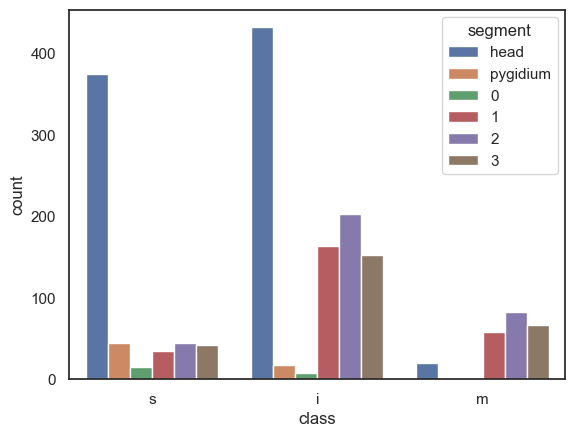

In [45]:
sns.set(style="white")
sns.barplot(x="class", y="count", hue="segment", data=df_segs)

In [2]:
from pkg.platy import load_0_adj_labels, load_1_adj_labels, load_2_adj_labels, load_3_adj_labels, load_right_adj_labels, load_left_adj_labels, load_head_adj_labels, load_pygidium_adj_labels

#block for loading adjs/labels

#hemis
left_adj, left_labels = load_left_adj_labels()
right_adj, right_labels = load_right_adj_labels()

#segments
head_adj, head_labels = load_head_adj_labels()
pyg_adj, pyg_labels = load_pygidium_adj_labels()
adj_0, labels_0 = load_0_adj_labels()
adj_1, labels_1 = load_1_adj_labels()
adj_2, labels_2 = load_2_adj_labels()
adj_3, labels_3 = load_3_adj_labels()

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


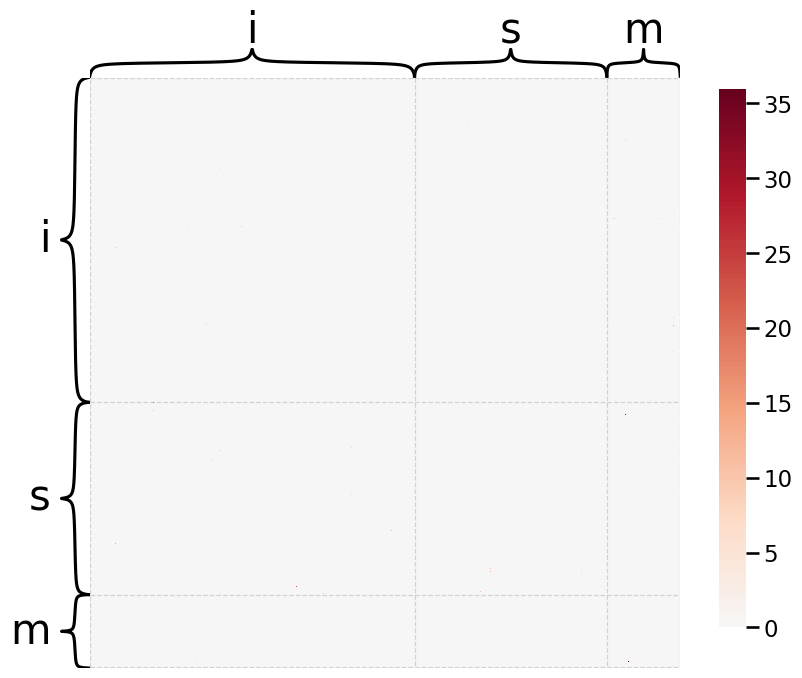

In [10]:
#heatmaps
np_left = left_adj.to_numpy()
np_right = right_adj.to_numpy()
heatmap(np_left, inner_hier_labels=left_labels)
print(np_left)
max = 0
for i in range(len(np_left)):
    for j in range(len(np_left[0])):
        if(np_left[i][j] > max):
            max = np_left[i][j]

In [16]:
# skids_left = pymaid.get_skids_by_annotation("left")
# skids_right = pymaid.get_skids_by_annotation("right")
# skids_head = pymaid.get_skids_by_annotation("head")
# skids_pygidium = pymaid.get_skids_by_annotation("pygidium")
# skids_0 = pymaid.get_skids_by_annotation("segment_0")
# skids_1 = pymaid.get_skids_by_annotation("segment_1")
# skids_2 = pymaid.get_skids_by_annotation("segment_2")
# skids_3 = pymaid.get_skids_by_annotation("segment_3")

In [8]:
#don't think i need this
# df_left = pymaid.adjacency_matrix(skids_left)
# df_right = pymaid.adjacency_matrix(skids_right)
# df_head = pymaid.adjacency_matrix(skids_head)
# df_pygidium = pymaid.adjacency_matrix(skids_pygidium)
# df_0 = pymaid.adjacency_matrix(skids_0)
# df_1 = pymaid.adjacency_matrix(skids_1)
# df_2 = pymaid.adjacency_matrix(skids_2)
# df_3 = pymaid.adjacency_matrix(skids_3)

In [9]:
# skids_sensory = pymaid.get_skids_by_annotation("Sensory neuron")
# skids_inter = pymaid.get_skids_by_annotation("interneuron")
# skids_motor = pymaid.get_skids_by_annotation("motorneuron")

In [10]:
# def class_labels(skids, skids_sensory, skids_inter, skids_motor):
#     new_skids = []
#     labels = []
#     for i, skid in enumerate(skids):
#         if skid in skids_sensory:
#             labels.append("s")
#             new_skids.append(skid)
#         elif skid in skids_inter:
#             labels.append("i")
#             new_skids.append(skid)
#         elif skid in skids_motor:
#             labels.append("m")
#             new_skids.append(skid)

#     return new_skids, labels

In [11]:
# left_new, left_labels = class_labels(skids_left, skids_sensory, skids_inter, skids_motor)
# right_new, right_labels = class_labels(skids_right, skids_sensory, skids_inter, skids_motor)
# head_new, head_labels = class_labels(skids_head, skids_sensory, skids_inter, skids_motor)
# pygidium_new, pygidium_labels = class_labels(skids_pygidium, skids_sensory, skids_inter, skids_motor)
# seg0_new, seg0_labels = class_labels(skids_0, skids_sensory, skids_inter, skids_motor)
# seg1_new, seg1_labels = class_labels(skids_1, skids_sensory, skids_inter, skids_motor)
# seg2_new, seg2_labels = class_labels(skids_2, skids_sensory, skids_inter, skids_motor)
# seg3_new, seg3_labels = class_labels(skids_3, skids_sensory, skids_inter, skids_motor)
# len(seg0_new)

In [12]:
# df_left = pymaid.adjacency_matrix(left_new)
# df_right = pymaid.adjacency_matrix(right_new)
# df_head = pymaid.adjacency_matrix(head_new)
# df_pygidium = pymaid.adjacency_matrix(pygidium_new)
# df_0 = pymaid.adjacency_matrix(seg0_new)
# df_1 = pymaid.adjacency_matrix(seg1_new)
# df_2 = pymaid.adjacency_matrix(seg2_new)
# df_3 = pymaid.adjacency_matrix(seg3_new)

In [13]:
# left_adj = df_left.to_numpy()
# right_adj = df_right.to_numpy()
# head_adj = df_head.to_numpy()
# pygidium_adj = df_pygidium.to_numpy()
# seg0_adj = df_0.to_numpy()
# seg1_adj = df_1.to_numpy()
# seg2_adj = df_2.to_numpy()
# seg3_adj = df_3.to_numpy()

In [14]:
# all_adjs = [left_adj, right_adj, head_adj, pygidium_adj, seg0_adj, seg1_adj, seg2_adj, seg3_adj]
# pairwise_adjs = list(itertools.combinations(all_adjs, 2))
# len(pairwise_adjs)

In [15]:
# stat, pval, misc = group_connection_test(left_adj, right_adj, left_labels, right_labels)
# pval